<a href="https://www.kaggle.com/code/nurgeldi0210/braintumorclassificatoin?scriptVersionId=160588942" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Brain tumor classification


### Import liblaries

In [1]:
import os
import cv2
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Initialize root directory

In [2]:
baseDir = "/kaggle/input/shadyfinal3/"
os.listdir(baseDir)

['validation', 'test', 'train']

### Sample image

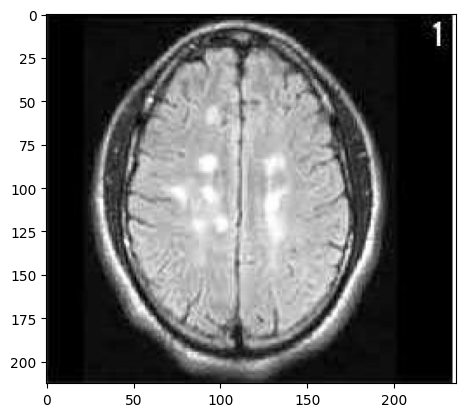

In [3]:
img_sample = baseDir + "test/no_tumor/no598.jpg"
img = cv2.imread(img_sample)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [4]:
img.shape

(213, 236, 3)

### Load datasets

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    baseDir  + "train",  
    labels="inferred",  
    image_size=(224, 224)
)

Found 15127 files belonging to 4 classes.


In [6]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
    baseDir  + "validation",  
    labels="inferred",  
    image_size=(224, 224)
)

Found 3050 files belonging to 4 classes.


In [7]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    baseDir  + "test",  
    labels="inferred",  
    image_size=(224, 224)
)

Found 3050 files belonging to 4 classes.


In [8]:
train_ds.class_names

['Glioma', 'Meningioma', 'Pituitary', 'no_tumor']

### Dataset normalization

In [9]:
def normalize(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

In [10]:
train_ds = train_ds.map(normalize)
test_ds = test_ds.map(normalize)
valid_ds = valid_ds.map(normalize)

### Load MobileNet CNN architecture

In [11]:
mobile_net = tf.keras.applications.MobileNet(input_shape = (224,224,3), include_top=True)

17225924/17225924 [==============================] - 0s 0us/step


In [12]:
mobile_net.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

### Create model

In [13]:
model = Sequential([
    mobile_net,
    Flatten(),
    Dense(1000, activation='relu'),
    Dense(100, activation='relu'),
    Dense(4, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 1000)              4253864   
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
 dense_2 (Dense)             (None, 4)                 404       
                                                                 
Total params: 5355368 (20.43 MB)
Trainable params: 5333480 (20.35 MB)
Non-trainable params: 21888 (85.50 KB)
_____________

In [15]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Train model

In [16]:
history = model.fit(train_ds, epochs=15, validation_data=valid_ds)

Epoch 1/15


2024-01-27 06:52:27.724035: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/mobilenet_1.00_224/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


473/473 [==============================] - 99s 170ms/step - loss: 0.6902 - accuracy: 0.7329 - val_loss: 0.8781 - val_accuracy: 0.7587
Epoch 2/15
473/473 [==============================] - 78s 164ms/step - loss: 0.4587 - accuracy: 0.8197 - val_loss: 0.4844 - val_accuracy: 0.8066
Epoch 3/15
473/473 [==============================] - 78s 164ms/step - loss: 0.3102 - accuracy: 0.8860 - val_loss: 0.3167 - val_accuracy: 0.8934
Epoch 4/15
473/473 [==============================] - 78s 164ms/step - loss: 0.2483 - accuracy: 0.9163 - val_loss: 0.2721 - val_accuracy: 0.8990
Epoch 5/15
473/473 [==============================] - 78s 164ms/step - loss: 0.2136 - accuracy: 0.9252 - val_loss: 0.1827 - val_accuracy: 0.9357
Epoch 6/15
473/473 [==============================] - 78s 164ms/step - loss: 0.1607 - accuracy: 0.9422 - val_loss: 0.1148 - val_accuracy: 0.9623
Epoch 7/15
473/473 [==============================] - 78s 165ms/step - loss: 0.1412 - accuracy: 0.9548 - val_loss: 0.1529 - val_accuracy: 0.9

### Evaluate model

In [17]:
model.evaluate(test_ds)

96/96 [==============================] - 9s 86ms/step - loss: 0.2528 - accuracy: 0.9249


[0.2527921199798584, 0.9249180555343628]

### Plot model fit history

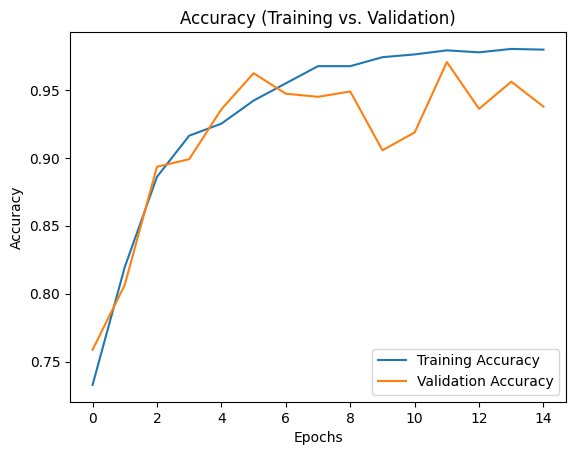

In [18]:
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Create line plots for accuracy and loss
plt.plot(train_accuracy, label="Training Accuracy")
plt.plot(val_accuracy, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy (Training vs. Validation)")
plt.legend()
plt.show()



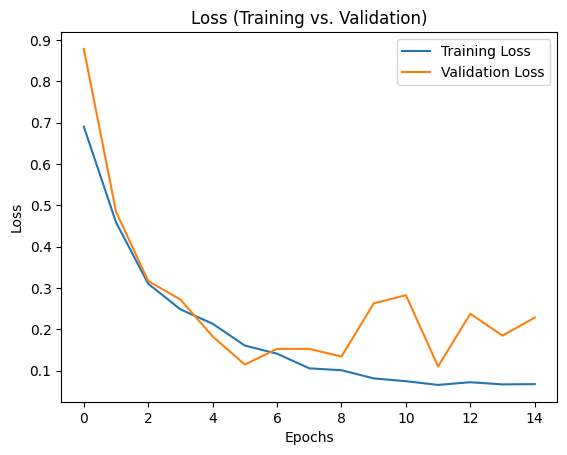

In [19]:
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss (Training vs. Validation)")
plt.legend()
plt.show()

### Save model

In [20]:
model.save("braintumorclassidication.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
